In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2022-02-11 06:30:22--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-02-11 06:30:22--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.01s   

2022-02-11 06:30:23 (4.62 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



### Exercise 1

A sawtooth signal has a waveform that ramps up linearly from -1 to 1, then drops to -1 and repeats. See http://en.wikipedia.org/wiki/Sawtooth_wave

Write a class called `SawtoothSignal` that extends `Signal` and provides `evaluate` to evaluate a sawtooth signal.

Compute the spectrum of a sawtooth wave. How does the harmonic structure compare to triangle and square waves? 


Напишем класс пилообразного сигнала:
(Не понял почему написано что надо расширять Signal, когда в книге расширяли Sinusiod, поэтому тоже сделал синусойд)

In [31]:
from thinkdsp import Sinusoid
from math import pi
from thinkdsp import unbias,normalize
import numpy as np


class SawtoothSignal(Sinusoid):

  def evaluate(self,ts):
    cycles = self.freq * ts + self.offset / (pi / 2)
    frac, _ = np.modf(cycles)
    u = unbias(frac)
    high, low = abs(max(u)), abs(min(u))
    ys = self.amp * u / max(high,low)
    return ys

Проверим график:

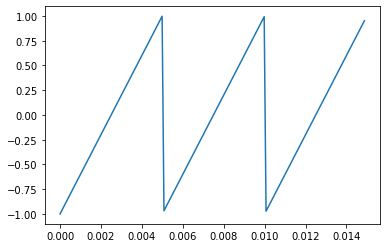

In [30]:
saw_signal = SawtoothSignal(200)
saw_signal.plot()

Сделаем экземпляр класса Wave для построения спектра сигнала

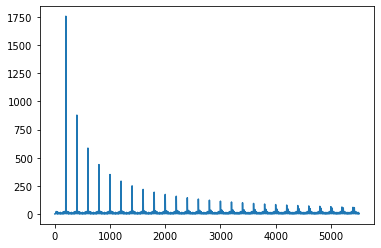

In [36]:
saw_spectrum = saw_signal.make_wave(duration = 0.5).make_spectrum()
saw_spectrum.plot()

Добавим прямоугольный сигнал:

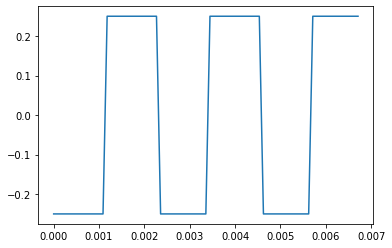

In [42]:
from thinkdsp import SquareSignal

squar_signal = SquareSignal(amp = 0.25)
squar_signal.plot()

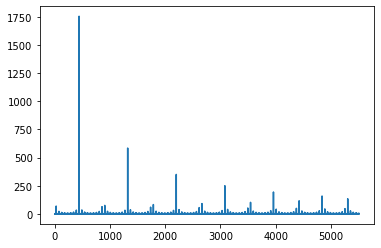

In [43]:
squar_spectrum = squar_signal.make_wave().make_spectrum()
squar_spectrum.plot()

И треугольный сигнал:


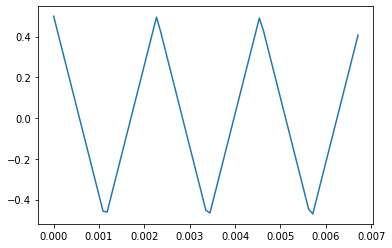

In [49]:
from thinkdsp import TriangleSignal

tri_signal = TriangleSignal(amp = 0.5)
tri_signal.plot()

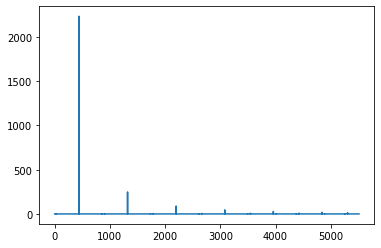

In [50]:
tri_spectrum = tri_signal.make_wave().make_spectrum()
tri_spectrum.plot()

Выводы:
По сравнению с квадратным сигналом, пилообразный включает в себя четные и нечётные гармоники. Но оба сигнала снижают амплитуду обратно пропорциально частоте.
По сравнению с треугольным сигналом, треугольный сигнал падает $1/f^2$, а пилообразный $1/f$.

### Exercise 2

Make a square signal at 1500 Hz and make a wave that samples it
at 10000 frames per second.  If you plot the spectrum, you can
see that most of the harmonics are aliased.
When you listen to the wave, can you hear the aliased harmonics? 

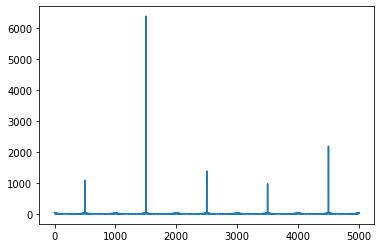

In [53]:
square_signal = SquareSignal(freq=1500)
square_wave = square_signal.make_wave(duration = 1, framerate = 10000)
square_wave.make_spectrum().plot()

По спекторграмме видим, что из-за выбранного фреймрейте 10000 у нас начинаются биения. Сигналы больших частот закольцовываются вокрог 5000Гц и 0Гц.

Когда мы слушаем получившийся звук, мы слышим основную частоту на 500Гц.

In [64]:
square_wave.make_audio()

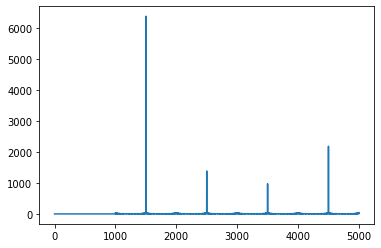

In [66]:
s1 = square_wave.make_spectrum()
s1.high_pass(1000)
s1.plot()

In [68]:
s1.make_wave().make_audio()

Звук отличается, значит действительно, мы слышим звук частотой 500Гц.

### Exercise 3

If you have a spectrum object, `spectrum`, and print the first few values of `spectrum.fs`, you’ll see that the frequencies start at zero. So `spectrum.hs[0]` is the magnitude of the component with frequency 0. But what does that mean?

Try this experiment:

1.    Make a triangle signal with frequency 440 and make a Wave with duration 0.01 seconds. Plot the waveform.
2.    Make a Spectrum object and print `spectrum.hs[0]`. What is the amplitude and phase of this component?
3.    Set `spectrum.hs[0] = 100`. Make a Wave from the modified Spectrum and plot it. What effect does this operation have on the waveform?

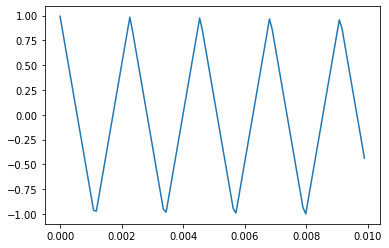

In [70]:
trian_signal = TriangleSignal(freq=440)
trian_wave = trian_signal.make_wave(duration = 0.01)
trian_wave.plot()

Проверим что лежит в 0 элементе чисел спекторграммы

In [71]:
trian_spectrum = trian_wave.make_spectrum()
trian_spectrum.hs[0]

(1.0436096431476471e-14+0j)

Видим комплексное число, с 0 мнимой частью. Сам элемент очень близок к нулю

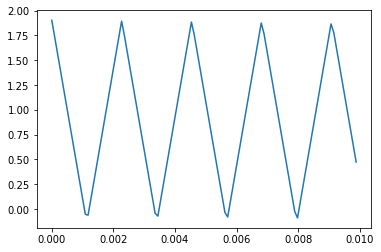

In [72]:
trian_spectrum.hs[0] = 100
trian_wave = trian_spectrum.make_wave()
trian_wave.plot()

Можно заметить, что сигнал сместился по вертикали вверх. Следовательно от первого элемента зависит смещение сигнала. Т.к. сначала элемент был близок к нулю, то нулевой элемент это сигнал без смещения.

### Exercise 4

Write a function that takes a Spectrum as a parameter and modifies it by dividing each element of hs by the corresponding frequency from fs. Test your function using one of the WAV files in the repository or any Wave object.

1. Compute the Spectrum and plot it.
2. Modify the Spectrum using your function and plot it again.
3. Make a Wave from the modified Spectrum and listen to it. What effect does this operation have on the signal?

Исходя из последнего пункта первый элемент очень близок к нулю. Поэтому на него делить не надо, а то получим очень большие значения. (На самом деле я понял это после запуска программы из-за ошибок при делении на ноль)

In [81]:
def spectrum_divider(spectrum):
    spectrum.hs[1:] /= spectrum.fs[1:]
    spectrum.hs[0] = 0

In [75]:
if not os.path.exists('164718__bradovic__piano.wav'):
    !wget https://github.com/wooftown/spbstu-telecom/raw/main/Content/164718__bradovic__piano.wav

--2022-02-11 07:23:13--  https://github.com/wooftown/spbstu-telecom/raw/main/Content/164718__bradovic__piano.wav
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/wooftown/spbstu-telecom/main/Content/164718__bradovic__piano.wav [following]
--2022-02-11 07:23:13--  https://raw.githubusercontent.com/wooftown/spbstu-telecom/main/Content/164718__bradovic__piano.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7637664 (7.3M) [application/octet-stream]
Saving to: ‘164718__bradovic__piano.wav’

164718__bradovic__p 100%[===================>]   7.28M  --.-KB/s    in 0.08s   

2022-02-11 07:23:13 (85.9 M

In [76]:
from thinkdsp import read_wave

wave = read_wave('164718__bradovic__piano.wav').segment(18.3,0.5)
wave.make_audio()

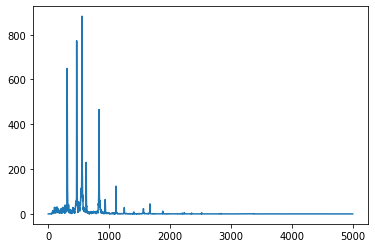

In [78]:
wave.make_spectrum().plot(high = 5000)

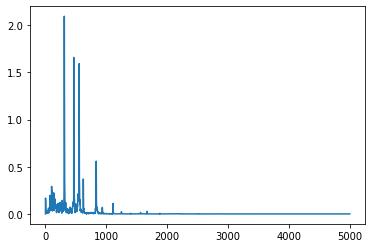

In [82]:
sp = wave.make_spectrum()
spectrum_divider(sp)
sp.plot(high = 5000)

Видим. что ампилутуда очень поменялась, а частоты стоящие ближе к 0 Гц стали больше, чем следующие, что понятно.

In [83]:
sp.make_wave().make_audio()

На выходе получилось, что полученный звук звучит более чисто, из-за фильтрации высоких частот.

### Exercise 5

The triangle and square waves have odd harmonics only; the sawtooth wave has both even and odd harmonics. The harmonics of the square and sawtooth waves drop off in proportion to $1/f$; the harmonics of the triangle wave drop off like $1/f^2$. Can you find a waveform that has even and odd harmonics that drop off like $1/f^2$?

Hint: There are two ways you could approach this: you could
construct the signal you want by adding up sinusoids, or you
could start with a signal that is similar to what you want and
modify it.

Не зря мы писали предыдущую функцию, поэтому возьмём пилообразный сигнал который имеет и четные и нечётные гармоники, а потом применим нашу функцию.

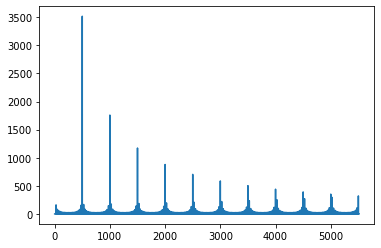

In [89]:
saw_signal = SawtoothSignal(500)
saw_spectrum = saw_signal.make_wave().make_spectrum()
saw_spectrum.plot()

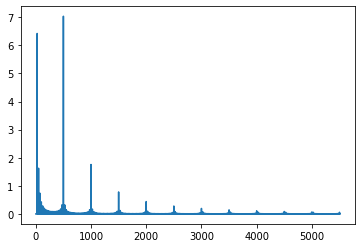

In [90]:
saw_spectrum1 =  saw_signal.make_wave().make_spectrum()
spectrum_divider(saw_spectrum1)
saw_spectrum1.plot()

Тут получилось, что амплитуда у 0 слишком большая, исправим изменив параметры.

In [109]:
saw_signal = SawtoothSignal(freq=freq)
saw_wave = saw_signal.make_wave(duration=1, framerate=10000)
wave.make_audio()

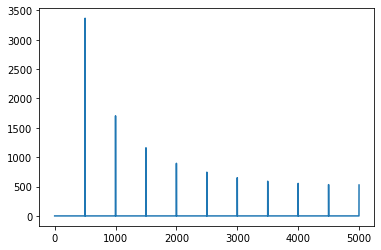

In [114]:
saw_spectrum = saw_wave.make_spectrum()
saw_spectrum.plot()

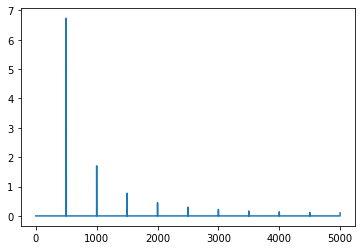

In [115]:
saw_spectrum1 = saw_wave.make_spectrum()
spectrum_divider(saw_spectrum1)
saw_spectrum1.plot()

Теперь нам интересно какой получился график


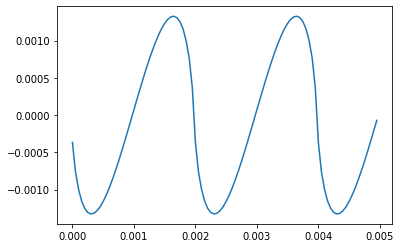

In [112]:
saw_spectrum1.make_wave().segment(duration = 0.005).plot()


Сигнал немного напоминает синусойду, но она как-будто немного наклонена.

In [113]:
saw_spectrum1.make_wave().make_audio()